# University of Virginia
## DS 7200: Distributed Computing
## Final Project

### Team 5: Gia Smith, Luz Melo, Meesun Yang

---

# STEP 1: Data Import and Preprocessing

preprocessing include such tasks as imputing, binning, filtering, outlier treatment, feature engineering, 
text processing.

In [1]:
import os
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DateType, FloatType, LongType
from pyspark.sql import functions as F
import numpy as np
from pyspark.sql import SQLContext
from pyspark.sql.functions import lit
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
from pyspark.sql.functions import mean, stddev, corr
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator

## The Data

In [2]:
# Read in stock data. Source: Yahoo! finance
path1 = 'KO.csv'
path2 = 'KO_1st_toLoad.csv'
path3 = 'KO_quarterly_valuation_measures.csv'
path4 = 'KO_quarterly_financials.csv'
path5 = 'KO_quarterly_balance-sheet.csv'
path6 = 'KO_quarterly_cash-flow.csv'
path7 = 'KO_merged_data.csv'
path8 = 'filtered_merged_data.csv'
path9 = 'KO_filtered_merged_data.csv'
path10 = 'KOv3.csv'

In [3]:
# set up schema
stock_schema = StructType([StructField('Date',DateType(),False),
                           StructField('Open',FloatType(),False),
                           StructField('High',FloatType(),False),
                           StructField('Low',FloatType(),False),
                           StructField('Close',FloatType(),False),
                           StructField('Adj Close',FloatType(),False),
                           StructField('Volume',FloatType(),False),
                         ])

### Merge Datasets: Valuation Measures, Income Statement, Balance Sheet, and Cash Flow.

### Cleaning Merged Dataset

### Join filtered Historical data and merged dataset

# STEP 2: Data Splitting and Sampling

# STEP 3: Exploratory Data Analysis

## Historical Data: Daily

In [5]:
# set up the session
spark = SparkSession.builder.getOrCreate()

In [6]:
df1 = spark.read.csv(path1, header=True, schema=stock_schema)
df1.show()

+----------+--------+--------+--------+--------+---------+---------+
|      Date|    Open|    High|     Low|   Close|Adj Close|   Volume|
+----------+--------+--------+--------+--------+---------+---------+
|1962-01-02|0.263021|0.270182|0.263021|0.263021| 0.048528| 806400.0|
|1962-01-03|0.259115|0.259115|0.253255|0.257161| 0.047447|1574400.0|
|1962-01-04|0.257813|0.261068|0.257813|0.259115| 0.047807| 844800.0|
|1962-01-05|0.259115| 0.26237|0.252604|0.253255| 0.046726|1420800.0|
|1962-01-08|0.251302|0.251302|0.245768|0.250651| 0.046246|2035200.0|
|1962-01-09|0.250651| 0.25651|0.248698|0.255208| 0.047087| 960000.0|
|1962-01-10|0.255208|0.260091|0.252604| 0.25651| 0.047327|1612800.0|
|1962-01-11| 0.25651|0.259115|0.255208|0.259115| 0.047807| 614400.0|
|1962-01-12|0.259115|0.259115|0.254557|0.257161| 0.047447| 883200.0|
|1962-01-15| 0.25651| 0.25651|0.253906|0.254557| 0.046966| 614400.0|
|1962-01-16|0.253906|0.253906|0.249674|    0.25| 0.046126|1113600.0|
|1962-01-17|    0.25|    0.25|0.24

In [7]:
df1.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: float (nullable = true)



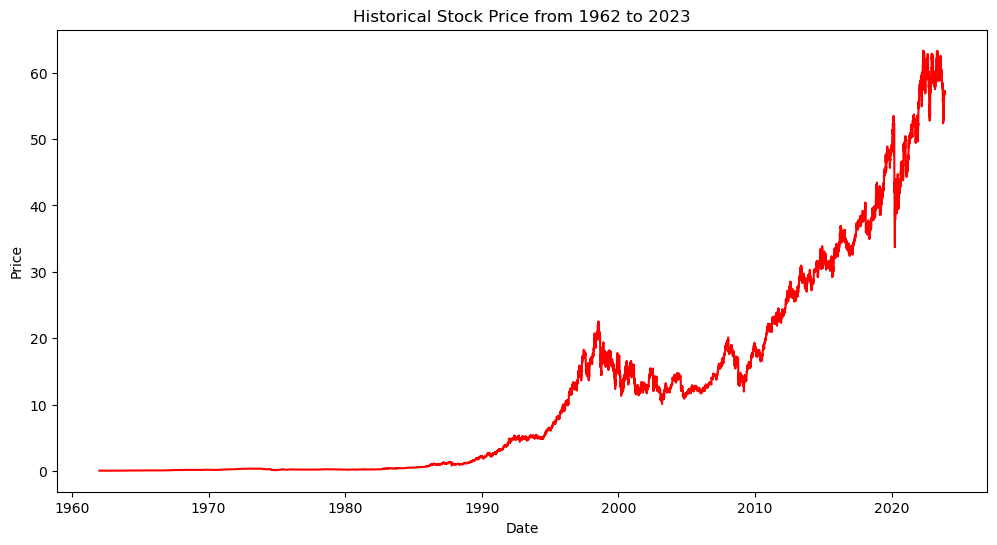

In [8]:
# Imports
import matplotlib.pyplot as plt

# Assuming 'Date' and 'Volume' are column names in your DataFrame
prices_and_volume = df1.select("Date", "Adj Close", "Volume").collect()
dates = [row.Date for row in prices_and_volume]
prices = [row["Adj Close"] for row in prices_and_volume]
volume = [row.Volume for row in prices_and_volume]

# Creating subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting stock prices on the first y-axis
ax1.plot(dates, prices, color='red', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis='y')
ax1.set_title("Historical Stock Price from 1962 to 2023")


# Displaying the plot
plt.show()

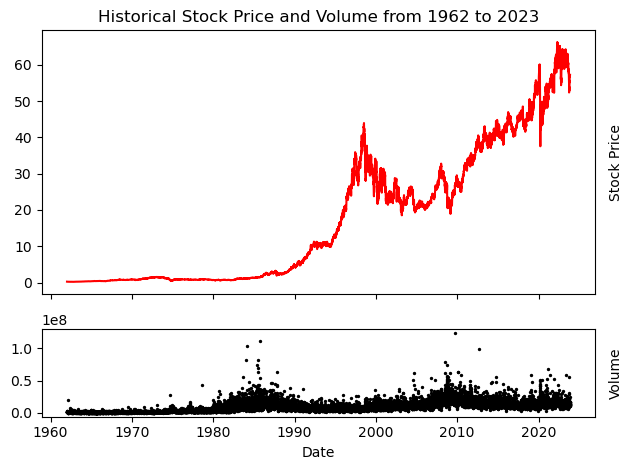

In [9]:
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt

# Assuming you have already created the SparkSession and df1 DataFrame

start_date = pd.to_datetime('1962-01-02')
end_date = pd.to_datetime('2023-11-17')

# Convert the 'Date' column to a datetime type in PySpark
df1 = df1.withColumn('Date', F.to_date(df1['Date']))

# Filter the DataFrame based on the date range
df2 = df1.filter((df1['Date'] >= start_date) & (df1['Date'] <= end_date))

# Convert the filtered DataFrame to a Pandas DataFrame for plotting
pd_df2 = df2.toPandas()

# Set the 'Date' column as the index
pd_df2.set_index('Date', inplace=True)

# Plotting
fig, (top_plt, bottom_plt) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Top plot (stock prices)
top_plt.plot(pd_df2.index, pd_df2["Close"], color='red')
top_plt.set_title('Historical Stock Price and Volume from 1962 to 2023')
top_plt.set_ylabel('Stock Price')

# Bottom plot (volume)
bottom_plt.scatter(pd_df2.index, pd_df2['Volume'], color = "black", s=2)
bottom_plt.set_ylabel('Volume')

# Add x-axis label to the bottom plot
bottom_plt.set_xlabel('Date')

# Add labels on the right side
top_plt.yaxis.set_label_coords(1.05, 0.5)
bottom_plt.yaxis.set_label_coords(1.05, 0.5)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Historical Data: Quaterly

In [10]:
df2 = spark.read.csv(path2, header=True, inferSchema=True)

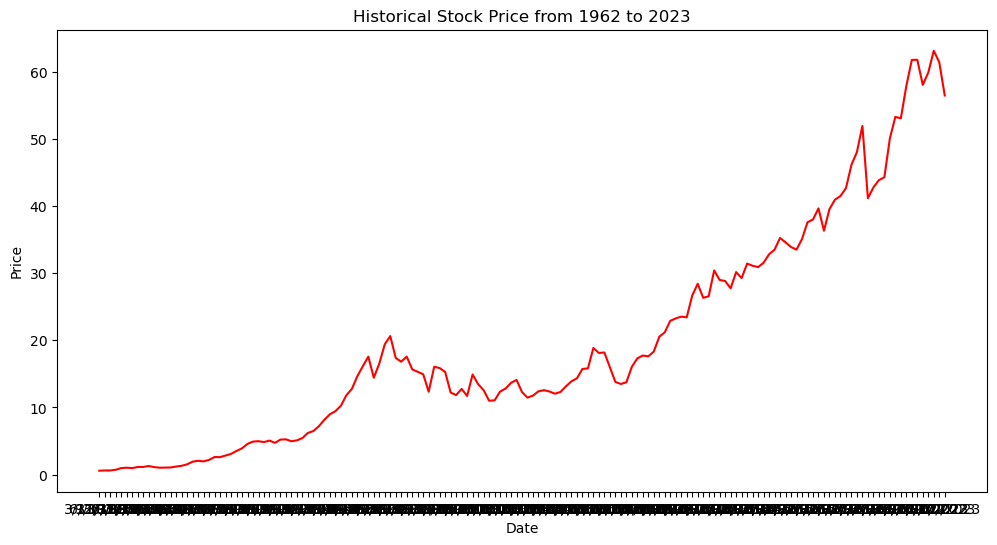

In [11]:
# Imports
import matplotlib.pyplot as plt

# Assuming 'Date' and 'Volume' are column names in your DataFrame
prices_and_volume = df2.select("Date", "Adj Close", "Volume").collect()
dates = [row.Date for row in prices_and_volume]
prices = [row["Adj Close"] for row in prices_and_volume]
volume = [row.Volume for row in prices_and_volume]

# Creating subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting stock prices on the first y-axis
ax1.plot(dates, prices, color='red', label='Stock Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis='y')
ax1.set_title("Historical Stock Price from 1962 to 2023")


# Displaying the plot
plt.show()

### Statistical Information

In [12]:
mean_price = df1.select(mean("Close")).first()[0]
stddev_price = df1.select(stddev("Close")).first()[0]
corr_price_volume = df1.select(corr("Close", "Volume")).first()[0]

print("Mean Price:", mean_price)
print("Standard Deviation Price:", stddev_price)
print("Correlation between Price and Volume:", corr_price_volume)

Mean Price: 17.44691300745597
Standard Deviation Price: 18.399699444096413
Correlation between Price and Volume: 0.47349443753791776


In [13]:
df1.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|              Open|              High|               Low|             Close|         Adj Close|           Volume|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|             15578|             15578|             15578|             15578|             15578|            15578|
|   mean|17.443087905915117|17.584551596108934| 17.29806420616332| 17.44691300745597|12.287431249795091|9212160.328668635|
| stddev| 18.39905733332124|18.532486456813324|18.260003923963637|18.399699444096413|15.744719260632824|7942933.496331465|
|    min|          0.192708|          0.193359|          0.182292|          0.192057|          0.035927|          76800.0|
|    max|              67.0|              67.2|             65.72|             66.21|          63.31803|        1.24169E8|
+-------+-------

### Questions to Analyze Using PySpark

In this section, we will give answers to some questions data using PySpark’s data preprocessing technique

- What is the average adjusted closing price?
- On what day stock price was the highest?
- For how many days the adjusted closing value was less than the average?
- On what days was the volume the higest? Show the top 20 dates.
- What is the maximum and minimum volume of stock traded?

**What is the average adjusted closing price?**

In [14]:
from pyspark.sql.functions import avg

# Calculate the average closing price
avg_close = df1.select(avg("Close")).first()[0]

print(f"The average closing price is: {avg_close}")

The average closing price is: 17.44691300745597


**On what day stock price was the highest?**

In [15]:
from pyspark.sql.functions import col, max

# Assuming the closing price column is named 'Close'
max_close_row = df1.select("Date", "Adj Close").orderBy(col("Adj Close").desc()).first()

print(f"On {max_close_row['Date']}, the stock price was the highest: {max_close_row['Adj Close']}")

On 2022-04-21, the stock price was the highest: 63.318031311035156


**For how many days the adjusted closing value was less than the average?**

In [16]:
# Filter the days where the closing value was less than the average
below_avg_days = df1.filter(col("Adj Close") < avg_close).count()

# Calculate the total number of days
total_days = df1.count()

# Calculate the percentage
percentage_below_avg = (below_avg_days / total_days) * 100

print(f"For {below_avg_days} days, the adjusted closing value was less than the average.")
print(f"This is {percentage_below_avg:.2f}% of the total days.")

For 11658 days, the adjusted closing value was less than the average.
This is 74.84% of the total days.


**On what days was the volume the higest? Show the top 20 dates.**

In [17]:
# register stock dataFrame as temp view with name "stocks"
df1.createOrReplaceTempView("stocks")

# query the view to get the top 20 dates with the highest volume
sqlDF1 = spark.sql("SELECT * FROM stocks ORDER BY Volume DESC LIMIT 20")
sqlDF1.show()

+----------+--------+--------+--------+--------+---------+-----------+
|      Date|    Open|    High|     Low|   Close|Adj Close|     Volume|
+----------+--------+--------+--------+--------+---------+-----------+
|2009-09-18|   26.84|   27.06|   26.65|   26.88|17.449154|  1.24169E8|
|1985-09-09|1.463542|1.476563|1.427083|  1.4375| 0.576012|  1.10784E8|
|1984-03-15|1.117188|1.122396|1.117188|1.122396| 0.425084|  1.03776E8|
|2012-09-21|   38.73|   38.74|   37.88|   38.03|26.943003|9.8967504E7|
|1985-06-10|1.445313|1.445313|1.427083|1.432292| 0.567748|   8.2656E7|
|1984-01-12|1.111979|1.114583|1.052083|1.065104| 0.398109|  8.16096E7|
|2008-07-17|    25.6|   25.68|   24.85|   25.17|15.655744|  7.92144E7|
|1985-04-25|1.434896|1.445313|1.408854|1.416667| 0.561554|   7.3968E7|
|2008-10-10|  21.025|  22.525|  20.145|   20.75|12.998294|  7.35672E7|
|1985-07-10| 1.46875|1.515625| 1.46875|1.507813| 0.604187|   6.9264E7|
|2021-03-19|   50.46|   51.08|   50.17|   50.81| 47.13688|6.7845696E7|
|2010-

**What is the maximum and minimum volume of stock traded?**

In [18]:
from pyspark.sql.functions import desc, asc

# Assuming 'Date' and 'Volume' are column names in your DataFrame
max_volume_row = df1.orderBy(desc('Volume')).first()
min_volume_row = df1.orderBy(asc('Volume')).first()

# Extracting date and volume information
max_volume_date = max_volume_row['Date']
max_volume_value = max_volume_row['Volume']

min_volume_date = min_volume_row['Date']
min_volume_value = min_volume_row['Volume']

# Printing the results
print(f"On {max_volume_date}, the maximum volume of {max_volume_value} stocks was traded.")
print(f"On {min_volume_date}, the minimum volume of {min_volume_value} stocks was traded.")

On 2009-09-18, the maximum volume of 124169000.0 stocks was traded.
On 1963-10-16, the minimum volume of 76800.0 stocks was traded.


### Valuation Measures

In [19]:
df3 = spark.read.csv(path3, header=True, inferSchema=True)
df3.show(10)

+----------+---------------+---------------+-------+--------------+--------+-------+-------+----------------------------+---------------------------+
|      Date|      MarketCap|EnterpriseValue|PeRatio|ForwardPeRatio|PegRatio|PsRatio|PbRatio|EnterprisesValueRevenueRatio|EnterprisesValueEBITDARatio|
+----------+---------------+---------------+-------+--------------+--------+-------+-------+----------------------------+---------------------------+
|       ttm|247,558,674,760|272,294,674,760| 23.182|         20.45|   2.698|  5.522|  9.404|                       6.047|                     17.509|
| 9/30/2023|242,057,520,000|267,988,520,000| 23.228|        19.763|   2.582|  5.509|  9.305|                       22.42|                     63.883|
| 6/30/2023|260,391,280,000|288,496,280,000| 26.529|        23.202|   3.282|  6.019| 10.326|                      24.098|                     81.611|
| 3/31/2023|268,279,750,000|295,797,750,000| 28.324|        23.866|   3.378|  6.275|  11.13|        

### Income Statement

In [20]:
# set up the session
df4 = spark.read.csv(path4, header=True, inferSchema=True)
#df4.show(10)

### Balance Sheet

In [21]:
df5 = spark.read.csv(path5, header=True, inferSchema=True)
#df5.show(10)

### Cash Flow

In [22]:
df6 = spark.read.csv(path6, header=True, inferSchema=True)
#df6.show(10)

# STEP 4: Model Construction

## Gradient-boosted Trees

### Gradient-boosted Trees: Historical Data

In [23]:
feature_columns = df1.columns
feature_columns.remove('Adj Close')
feature_columns.remove('Date')

In [24]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Split the data into training and testing sets
(training_data, testing_data) = df1.randomSplit([0.8, 0.2], seed=1234)

# Create a GBTRegressor
gbt = GBTRegressor(featuresCol='features', labelCol='Adj Close', maxDepth=5, maxBins=32, maxIter=20, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, gbt])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)

# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")

# An aRMSE value close to 1 implies that the model's predictions have a high level of error relative to the range of the target variable.

Root Mean Squared Error (RMSE) on the test data: 1.2130441761449018
R-Squared on the test data: 0.9940429744791378
MAE on the test data: 0.6054307770642364


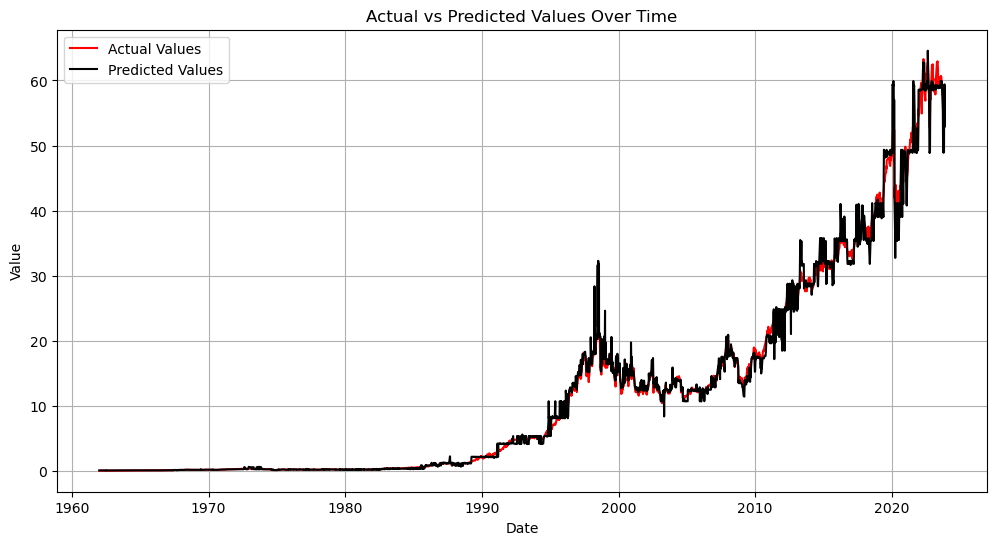

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pd = predictions.select("Date", "Adj Close", "prediction").toPandas()

# Convert the 'Date' column to datetime type
predictions_pd['Date'] = pd.to_datetime(predictions_pd['Date'])

# Sorting the DataFrame by 'Date' for proper plotting
predictions_pd = predictions_pd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['Date'], predictions_pd['Adj Close'], label='Actual Values', color='red')
plt.plot(predictions_pd['Date'], predictions_pd['prediction'], label='Predicted Values', color='black')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Gradient-boosted Trees: KOv3 on Adj Close all columns

In [77]:
df10 = spark.read.csv(path10, header=True, inferSchema=True)

In [78]:
feature_columns = df10.columns
feature_columns.remove('Adj Close')
feature_columns.remove('Date')

In [79]:
# Convert the TaxEffectOfUnusualItems column from string to double 
df10 = df10.withColumn("TaxEffectOfUnusualItems", col("TaxEffectOfUnusualItems").cast("double"))
#df10. printSchema()

In [84]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features', handleInvalid="skip")

# Split the data into training and testing sets
(training_data, testing_data) = df10.randomSplit([0.8, 0.2], seed=1234)

training_data = training_data.na.drop()

# Create a GBTRegressor
gbt = GBTRegressor(featuresCol='features', labelCol='Adj Close', maxDepth=5, maxBins=32, maxIter=20, seed=42)

# Create a RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol="Adj Close", numTrees=100, maxDepth=5, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, gbt])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)

# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")

Root Mean Squared Error (RMSE) on the test data: 3.273395774607916
R-Squared on the test data: 0.8830425082293992
MAE on the test data: 2.8027980701128072


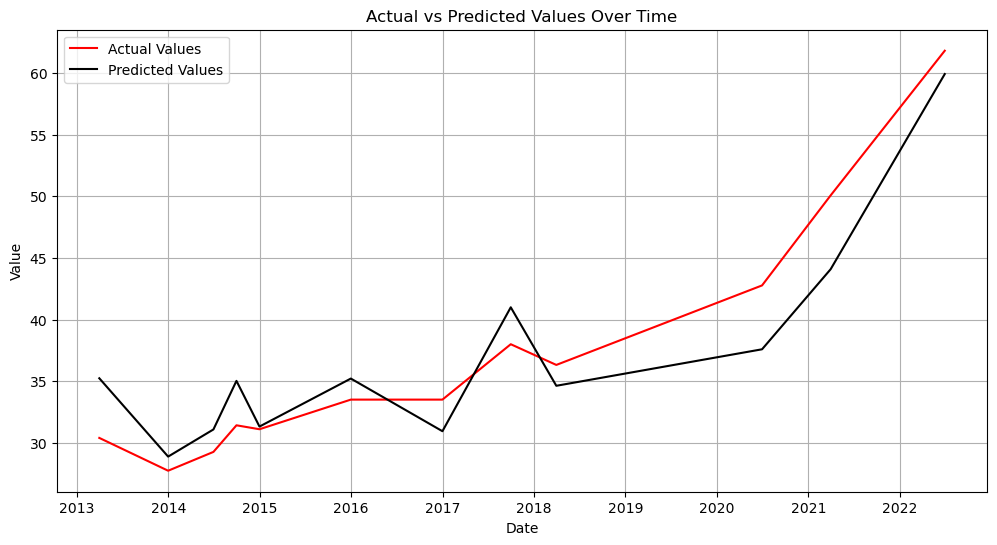

In [85]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pd = predictions.select("Date", "Adj Close", "prediction").toPandas()

# Convert the 'Date' column to datetime type
predictions_pd['Date'] = pd.to_datetime(predictions_pd['Date'])

# Sorting the DataFrame by 'Date' for proper plotting
predictions_pd = predictions_pd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['Date'], predictions_pd['Adj Close'], label='Actual Values', color='red')
plt.plot(predictions_pd['Date'], predictions_pd['prediction'], label='Predicted Values', color='black')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Outcome Correlation

Correlation is a statistical measure that quantifies the degree to which two variables are related. A high positive correlation indicates a strong positive relationship, while a high negative correlation indicates a strong negative relationship.

In [31]:
import six
import pandas as pd

correlation_list = []

# iterate through the columns of the DataFrame
for i in feature_columns:
    # check if the column is not a string type
    if not isinstance(df10.select(i).take(1)[0][0], six.string_types):
        # calculate the correlation with 'Adj Close'
        correlation_value = df10.stat.corr('Adj Close', i)
        
        # append the pair (feature, correlation) to the list
        correlation_list.append((i, correlation_value))

# convert the list to a DataFrame
correlation_df = pd.DataFrame(correlation_list, columns=['Feature', 'Correlation'])

# sort the DataFrame by absolute correlation in descending order
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

In [32]:
print(correlation_df.head(10))

                                          Feature  Correlation
3                                           Close     0.969214
2                                             Low     0.968765
0                                            Open     0.962377
1                                            High     0.962049
7                                 EnterpriseValue     0.958147
64  TotalNonCurrentLiabilitiesNetMinorityInterest     0.944083
6                                       MarketCap     0.937978
66                                   LongTermDebt     0.937168
65          LongTermDebtAndCapitalLeaseObligation     0.937168
69                     OtherNonCurrentLiabilities     0.925659


In [33]:
# Find the column with the minimum absolute correlation value
min_absolute_corr_column = correlation_df.loc[correlation_df['Correlation'].idxmin()]

# Print the result
print(min_absolute_corr_column)

Feature        BasicAverageShares
Correlation             -0.867125
Name: 30, dtype: object


### Feature Importance

In [34]:
# Extract feature importance from the trained GBT model
feature_importance = model.stages[-1].featureImportances

# Create a Pandas DataFrame for better visualization
feature_importance_df = pd.DataFrame(list(zip(feature_columns, feature_importance)), columns=['Feature', 'Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Consider only the top 10 features
top_10_features = feature_importance_df.head(10)

# Print or visualize the top 10 feature importance
print(top_10_features)

                         Feature  Importance
1                           High    0.771520
3                          Close    0.152165
49                     Inventory    0.044250
0                           Open    0.020434
9                        PsRatio    0.004295
4             PercentChangeClose    0.002081
11  EnterprisesValueRevenueRatio    0.001228
21                  PretaxIncome    0.000945
98           CommonStockPayments    0.000815
13                  TotalRevenue    0.000703


In [40]:
# Extract the top 10 features as a list of tuples
feature_columns = top_10_features['Feature'].values.tolist()

# Print the list
print(feature_columns)

['High', 'Close', 'Inventory', 'Open', 'PsRatio', 'PercentChangeClose', 'EnterprisesValueRevenueRatio', 'PretaxIncome', 'CommonStockPayments', 'TotalRevenue']


### Gradient-boosted Trees: KOv3 on Adj Close with subset of columns

In [42]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features', handleInvalid="skip")

# Split the data into training and testing sets
(training_data, testing_data) = df10.randomSplit([0.8, 0.2], seed=1234)

training_data = training_data.na.drop()

# Create a GBTRegressor
gbt = GBTRegressor(featuresCol='features', labelCol='Adj Close', maxDepth=5, maxBins=32, maxIter=20, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, gbt])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)


# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")

Root Mean Squared Error (RMSE) on the test data: 12.573964510972724
R-Squared on the test data: 0.18330799339574
MAE on the test data: 9.663816100879473


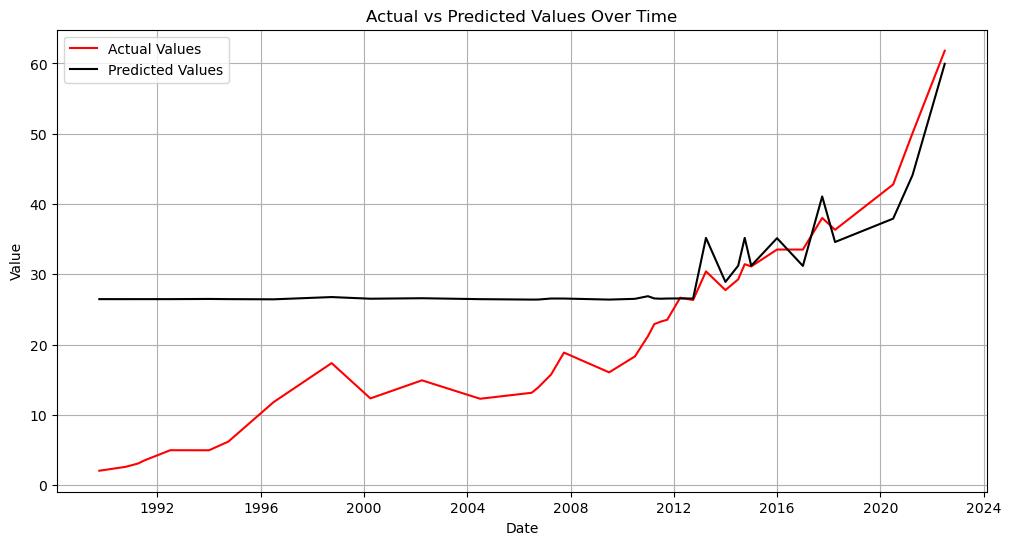

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pd = predictions.select("Date", "Adj Close", "prediction").toPandas()

# Convert the 'Date' column to datetime type
predictions_pd['Date'] = pd.to_datetime(predictions_pd['Date'])

# Sorting the DataFrame by 'Date' for proper plotting
predictions_pd = predictions_pd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['Date'], predictions_pd['Adj Close'], label='Actual Values', color='red')
plt.plot(predictions_pd['Date'], predictions_pd['prediction'], label='Predicted Values', color='black')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Gradient-boosted Trees: KOv3 on PercentChangeClose all columns

In [44]:
feature_columns = df10.columns
feature_columns.remove('PercentChangeClose')
feature_columns.remove('Date')

In [45]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features', handleInvalid="skip")

# Split the data into training and testing sets
(training_data, testing_data) = df10.randomSplit([0.8, 0.2], seed=1234)

training_data = training_data.na.drop()

# Create a GBTRegressor
gbt = GBTRegressor(featuresCol='features', labelCol='PercentChangeClose', maxDepth=5, maxBins=32, maxIter=20, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, gbt])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)


# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol='PercentChangeClose', predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol='PercentChangeClose', predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol='PercentChangeClose', predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")
# An aRMSE value close to 1 implies that the model's predictions have a high level of error relative to the range of the target variable.

Root Mean Squared Error (RMSE) on the test data: 0.07415345470557937
R-Squared on the test data: -0.319144520620918
MAE on the test data: 0.06366951452525545


## Random Forest

### Random Forest: Historical Data

In [58]:
feature_columns = df1.columns
feature_columns.remove('Adj Close')
feature_columns.remove('Date')
df1 = df1.orderBy(col('Date'))

In [59]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Define the feature assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Split the data into training and testing sets
(training_data, testing_data) = df1.randomSplit([0.8, 0.2], seed=1234)

# Create a RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol="Adj Close", numTrees=100, maxDepth=5, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)

# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")

# An aRMSE value close to 1 implies that the model's predictions have a high level of error relative to the range of the target variable.

Root Mean Squared Error (RMSE) on the test data: 1.3626758945092907
R-Squared on the test data: 0.9924827088127344
MAE on the test data: 0.758024749660953


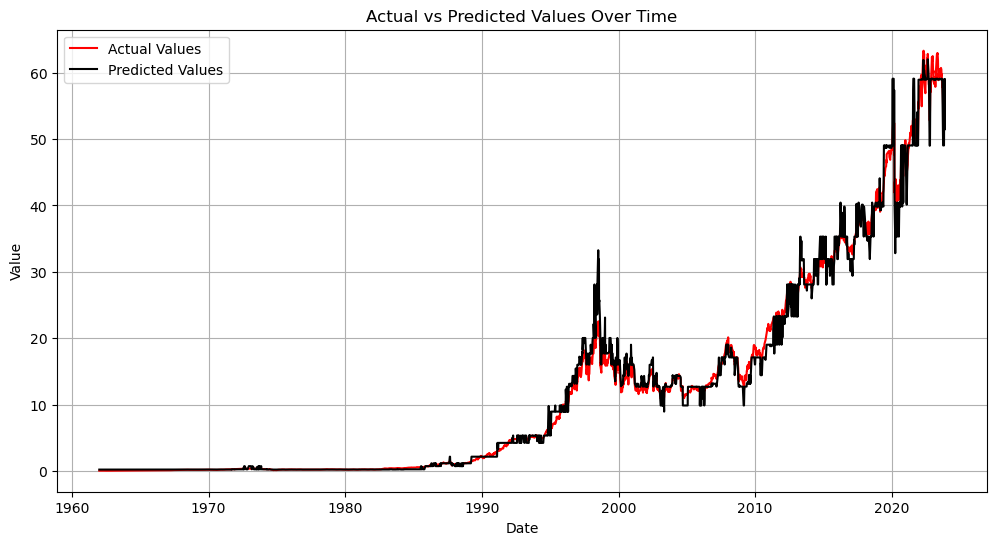

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pd = predictions.select("Date", "Adj Close", "prediction").toPandas()

# Convert the 'Date' column to datetime type
predictions_pd['Date'] = pd.to_datetime(predictions_pd['Date'])

# Sorting the DataFrame by 'Date' for proper plotting
predictions_pd = predictions_pd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['Date'], predictions_pd['Adj Close'], label='Actual Values', color='red')
plt.plot(predictions_pd['Date'], predictions_pd['prediction'], label='Predicted Values', color='black')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### Random Forest: KOv3 on Adj Close all columns

In [68]:
df10 = spark.read.csv(path10, header=True, inferSchema=True)

In [69]:
feature_columns = df10.columns
feature_columns.remove('Adj Close')
feature_columns.remove('Date')

In [70]:
# Convert the TaxEffectOfUnusualItems column from string to double 
df10 = df10.withColumn("TaxEffectOfUnusualItems", col("TaxEffectOfUnusualItems").cast("double"))
#df10. printSchema()

In [88]:
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features', handleInvalid="skip")

# Split the data into training and testing sets
(training_data, testing_data) = df10.randomSplit([0.8, 0.2], seed=1234)

training_data = training_data.na.drop()

# Create a RandomForestRegressor
rf = RandomForestRegressor(featuresCol='features', labelCol="Adj Close", numTrees=100, maxDepth=5, seed=42)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Fit the model
model = pipeline.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)

# Evaluate RMSE
evaluator = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on the test data: {rmse}")
# Evaluate R-squared
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="r2")
r2 = evaluator_r2.evaluate(predictions)
print(f"R-Squared on the test data: {r2}")
# Evaluate MAE
evaluator_r2 = RegressionEvaluator(labelCol="Adj Close", predictionCol="prediction", metricName="mae")
mae = evaluator_r2.evaluate(predictions)
print(f"MAE on the test data: {mae}")

Root Mean Squared Error (RMSE) on the test data: 1.5162551752366489
R-Squared on the test data: 0.9749056700813967
MAE on the test data: 1.1923251485773845


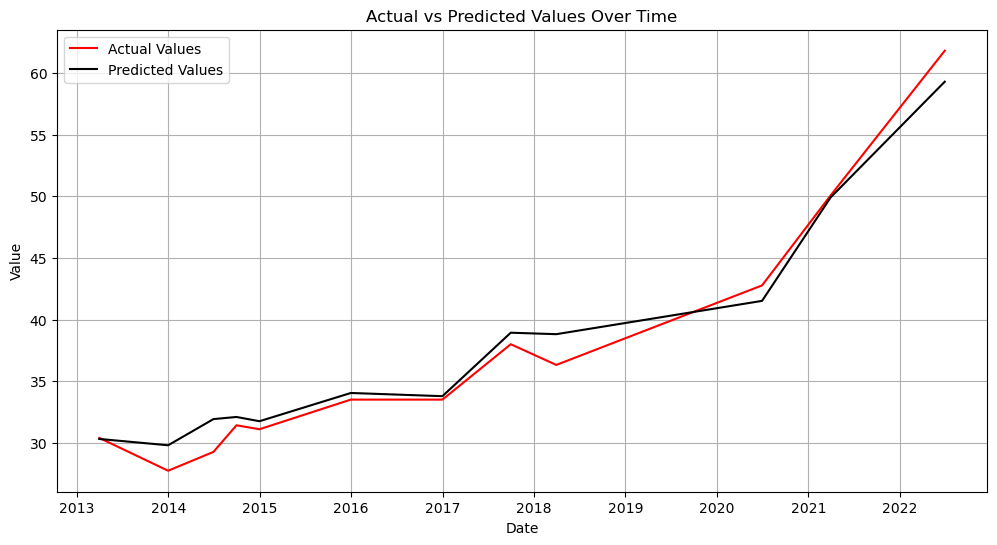

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
predictions_pd = predictions.select("Date", "Adj Close", "prediction").toPandas()

# Convert the 'Date' column to datetime type
predictions_pd['Date'] = pd.to_datetime(predictions_pd['Date'])

# Sorting the DataFrame by 'Date' for proper plotting
predictions_pd = predictions_pd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(predictions_pd['Date'], predictions_pd['Adj Close'], label='Actual Values', color='red')
plt.plot(predictions_pd['Date'], predictions_pd['prediction'], label='Predicted Values', color='black')
plt.title('Actual vs Predicted Values Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
# Extract feature importance from the trained RF model
feature_importance = model.stages[-1].featureImportances

# Create a Pandas DataFrame for better visualization
feature_importance_df = pd.DataFrame(list(zip(feature_columns, feature_importance)), columns=['Feature', 'Importance'])

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Consider only the top 10 features
top_10_features = feature_importance_df.head(10)

# Print or visualize the top 10 feature importance
print(top_10_features)

                                       Feature  Importance
1                                         High    0.157257
2                                          Low    0.127934
3                                        Close    0.107063
0                                         Open    0.079037
60                                    Payables    0.043525
59                  PayablesAndAccruedExpenses    0.033428
54            GoodwillAndOtherIntangibleAssets    0.028532
6                                    MarketCap    0.027813
7                              EnterpriseValue    0.027355
46  CashCashEquivalentsAndShortTermInvestments    0.025169
